In [22]:
%matplotlib notebook

In [23]:
%run ../setup_notebook.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# notebook specific imports
import pickle
import gsheets_importer
import math
import copy
from scipy import stats
import time
import random
import utils.utils_funcs as utils
from utils.cacher import preprocess_flu
from subsets_analysis import Subsets
np.mean = np.nanmean

In [25]:
mouse = 'J064'
run_number = '10'

pre_frames = 10
post_frames = 30

packerstation_path = '/home/jamesrowland/Documents/packerstation/jrowland/Data'
pkl_path = os.path.expanduser('~/Documents/code/Vape/run_pkls/{}/run{}.pkl'.format(mouse, run_number))

with open(pkl_path, 'rb') as f:
    run = pickle.load(f)
    
subsets = Subsets(run)

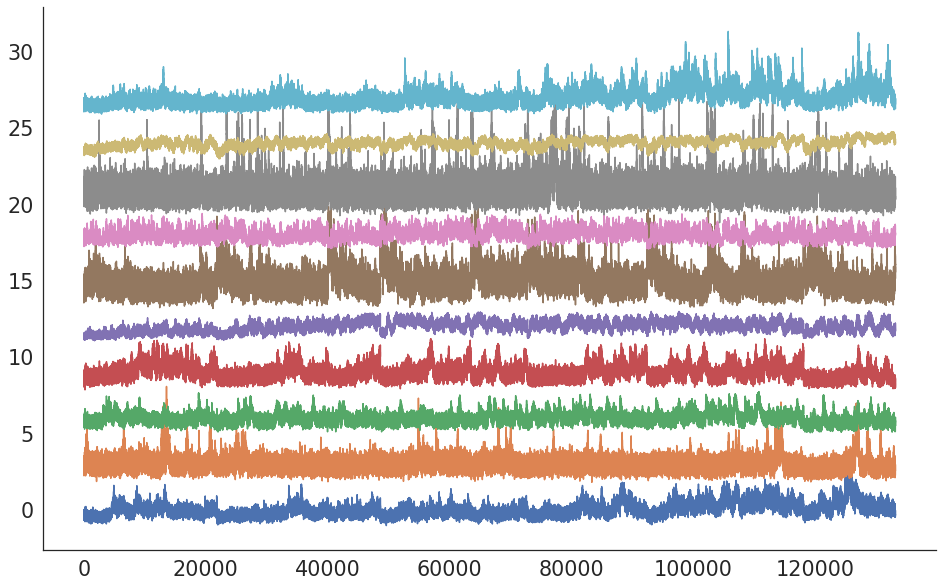

In [26]:
plt.figure(figsize=(16,10))
n_cells_plot = 10

cell_idxs = np.arange(run.flu.shape[0], dtype='int')

for i in range(n_cells_plot):
    plt.plot(run.flu[i+100, :] + i*3)

In [56]:
run = preprocess_flu(run)

/home/jrowland/mnt/qnap/Data/2019-12-13/suite2p/plane0
Loading 1064 traces labelled as cells
Loading 1064 traces labelled as cells
Subtracting neuropil with a coefficient of 0.7
All tseries chunks found in frame clock
Fluorescence matrix shape matches recorded frame clock


In [53]:
# split flu matrix into trials based on stim time
flu_array = utils.flu_splitter3(run.flu, run.trial_start, run.frames_ms,
                                pre_frames=pre_frames, post_frames=post_frames)

# trials_idx = np.where(runs[session_idx].outcome=='hit')[0]
trials_idx = np.where(Subsets(run).trial_subsets==150)[0]
flu_array = flu_array[:, trials_idx, :]
trial_average = np.mean(flu_array, 1)
flu_array.shape

(1064, 49, 40)

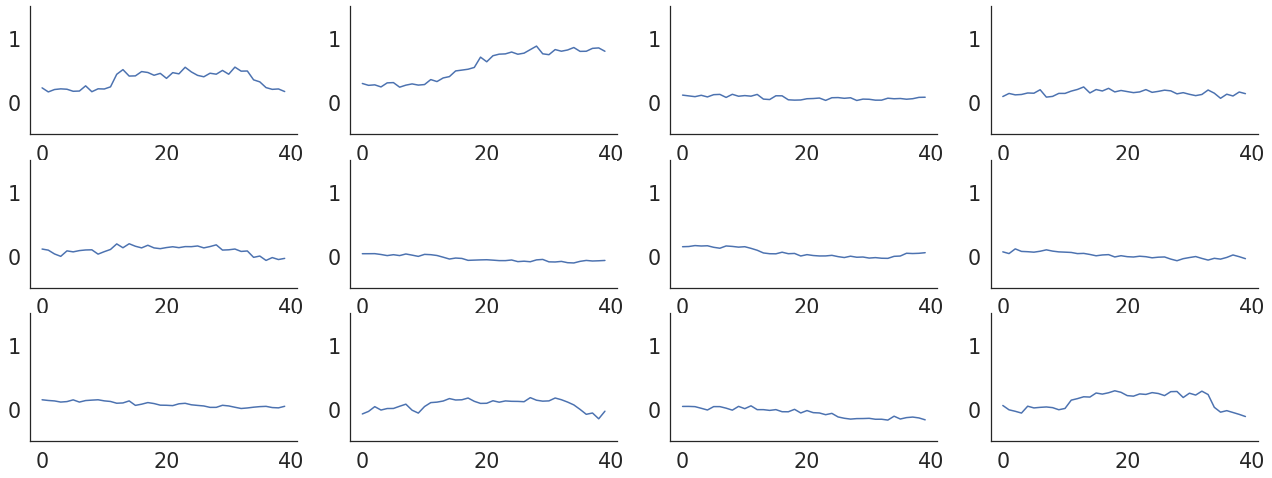

In [54]:
plt.figure(figsize=(22,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.plot(trial_average[i, :])
    plt.ylim((-0.5,1.5))


# # trial average for each cell

# trial_average.shape

# n_cells_plot = 12
# cell_idxs = np.arange(len(trial_average),dtype='int')

In [70]:
1/0

ZeroDivisionError: division by zero

In [71]:
stim_size = 150

In [72]:
figure_path = '/home/jamesrowland/Documents/Code/Vape/figures/s1s2_imaging_subsets_prototype'

In [73]:
frames_ms = run.frames_ms
flu = run.flu
n_cells = flu.shape[0]
x_galvo_uncaging = run.x_galvo_uncaging#[::1000]
tstart_galvo = utils.threshold_detect(x_galvo_uncaging, 0)

In [74]:
# plt.plot(x_galvo_uncaging)
# utils.raster_plot(tstart_galvo, y_pos=0, color='red')
# utils.raster_plot(run.both_aligner.A_to_B(run.trial_start))

In [75]:
#assert len(run.outcome) == len(subsets.trial_subsets) == len(run.trial_start) == len(tstart_galvo)

intersect = lambda A, B: list(set(A) - (set(A) - set(B)))

stim_idx = np.where(subsets.trial_subsets==stim_size)[0]

stim_times = run.trial_start[stim_idx]

### Toggle cell below on to switch to paqio alignment

In [76]:
# stim_times = tstart_galvo[stim_idx]

# num_planes = run.num_planes 
# tseries_lens = run.num_frames

# # get the frame ttls recorded in paqio that actually correspond to analysed tseries
# paqio_frames = utils.tseries_finder(tseries_lens, run.frame_clock)

# # which plane is each cell in
# cell_plane = np.array([s['iplane'] for s in run.stat])

# # matrix of frame times in ms for each fluorescent value in the flu matrix
# frames_ms = np.empty(flu.shape)
# frames_ms.fill(np.nan)

# num_planes = 3

# # mark each frame with a time in ms based on its plane
# for plane in range(num_planes):
#     frame_times = paqio_frames[plane::num_planes]
#     plane_idx = np.where(cell_plane==plane)[0]
#     frames_ms[plane_idx, 0:len(frame_times)] = frame_times
    
# frames_ms.shape

In [77]:


tot_frames = pre_frames + post_frames

stim_idxs = utils.stim_start_frame_mat(stim_times, frames_ms)
boi = copy.deepcopy(stim_idxs)

stim_idxs = stim_idxs[:,np.where((stim_idxs[0,:]-pre_frames>0) & 
                     (stim_idxs[0,:] + post_frames < flu.shape[1]))[0]]

n_trials = stim_idxs.shape[1]

for i, shift in enumerate(np.arange(-pre_frames,post_frames)):
    
    if i == 0: 
        trial_idx = stim_idxs + shift
    else:
        trial_idx = np.dstack((trial_idx, stim_idxs + shift))
        
trial_idx = trial_idx.reshape((n_cells, n_trials*tot_frames))
trial_idx.shape

n_trials

50

In [78]:
flu_trials = []

for i, idxs in enumerate(trial_idx):
    idxs = idxs[~np.isnan(idxs)].astype('int')
    flu_trials.append(flu[i,idxs])
  
n_trials_valid = len(idxs)
    
flu_trials = np.array(flu_trials).reshape((n_cells, int(n_trials_valid/tot_frames), tot_frames))
flu_trials = np.array(flu_trials)
flu_trials.shape

(2194, 50, 40)

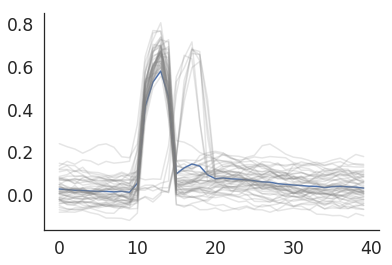

In [79]:
cell_meaned = np.mean(flu_trials,0)
mean_trial = np.mean(flu_trials, 2)
av = np.mean(np.mean(flu_trials, 1), 0)
plt.plot(av)
for i, c in enumerate(cell_meaned):
#     if c[11] > 0.4:
#         print(i)
    plt.plot(c, alpha=0.2, color='grey')

In [ ]:
=

In [81]:
run.stat[0]

{'ypix': array([907, 907, 907, 907, 907, 907, 908, 908, 908, 908, 908, 908, 908,
        908, 908, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909,
        910, 910, 910, 910, 910, 910, 910, 910, 910, 910, 910, 910, 910,
        910, 910, 910, 911, 911, 911, 911, 911, 911, 911, 911, 911, 911,
        911, 911, 911, 911, 911, 911, 912, 912, 912, 912, 912, 912, 912,
        912, 912, 912, 912, 912, 912, 912, 912, 913, 913, 913, 913, 913,
        913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 914, 914, 914,
        914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 915, 915, 915,
        915, 915, 915, 915, 915, 915, 915, 915, 916, 916, 916, 916, 916,
        916, 916, 916, 916, 917, 917, 917, 917, 917, 917, 917, 917, 918,
        918, 918, 918, 918, 919, 919, 919]),
 'lam': array([ 4.48898792,  7.6891017 ,  9.92327023, 11.09253216,  7.8238759 ,
         4.94398737,  3.3511188 ,  5.99675322, 10.01628494, 13.99384022,
        16.76867104, 18.89983559, 19.49352646, 17.54168892, 10.4